Question we are trying to answer is: Is it possible to classify movies by its release decade using features in its poster?
We will use pretrained machine learning models to answer that. We will try VGG16, and VGG19 and Resnet50 if time allows. 

Data cleaning and preparation code credit: https://github.com/timo-boehm/material_blog_posts/blob/master/collect_movie_posters.ipynb

In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
#pip install opencv-python

In [3]:
def read_and_clean_data(path):
    df = pd.read_csv(path, encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])
    df.set_index(["imdbId"], inplace=True)
    print(f"Shape of the original dataset: {df.shape}")
    df.dropna(inplace=True)
    print(f"Shape after dropping rows with missing values: {df.shape}")
    df.drop_duplicates(subset="Poster", keep=False, inplace=True)
    print(f"Shape after dropping rows with potentially misleading poster link: {df.shape}\n")
    return df

In [4]:
def add_year_variable(df):
    re_year = re.compile("\((\d{4})\)")
    df["year"] = df.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)
    print(f"There are movies between {int(np.min(df.year))} and {int(np.max(df.year))} available in the dataset.\n")
    return df

In [5]:
def create_boolean_genres(df):
    df["Genre"] = df.Genre.map(lambda x: x.split("|"))
    all_genres = set([item for l in df.Genre for item in l])
    print(f"There are {len(all_genres)} genres in the dataset: {all_genres}\n")
    for genre in all_genres:
        new_var = "is_" + re.sub(r'\W+', '', genre.lower())
        df[new_var] = df.Genre.map(lambda x: genre in x)
    df.drop(["Genre"], axis=1, inplace=True)
    return df

In [6]:
def extract_genre_data(df, genre="Action"):
    filter_var = "is_" + re.sub(r'\W+', '', genre.lower())
    df_genre = df.copy().loc[df[filter_var]]
    print(f"{genre} movies in the dataset: {df_genre.shape[0]}\n")
    return df_genre

In [7]:

def select_years(df, min_year, max_year, add_decades=True):
    df_range = df.copy().loc[(df.year >= min_year) & (df.year < max_year)]
    print(f"Movies left between {min_year} and {max_year}: {df_range.shape[0]}")
    if add_decades:
        df_range["decade"] = df_range.year.apply(lambda x: str(int(x))[2] +"0s")
        print(f"Movies per decade in the dataset:\n{df_range.decade.value_counts()}\n")
    return df_range

In [8]:
def sample_same_number_per_decade(df, use_test_sample=False):
    min_number = 40 if use_test_sample else np.min(df.decade.value_counts())
    df_sample = df.groupby("decade").apply(lambda x: x.sample(min_number))
    print(f"Sample includes {min_number} movies per decade")
    return df_sample

In [9]:
movie_data = read_and_clean_data(path="MovieGenre.csv")
movie_data1 = movie_data.copy()
movie_data = add_year_variable(movie_data)
movie_data = create_boolean_genres(movie_data)


Shape of the original dataset: (40108, 3)
Shape after dropping rows with missing values: (39263, 3)
Shape after dropping rows with potentially misleading poster link: (37850, 3)

There are movies between 1874 and 2018 available in the dataset.

There are 28 genres in the dataset: {'Sci-Fi', 'Horror', 'Documentary', 'History', 'Thriller', 'Drama', 'Short', 'Comedy', 'War', 'Adventure', 'Sport', 'Biography', 'Romance', 'News', 'Talk-Show', 'Family', 'Action', 'Game-Show', 'Reality-TV', 'Film-Noir', 'Western', 'Musical', 'Animation', 'Fantasy', 'Mystery', 'Adult', 'Music', 'Crime'}



In [10]:
movie_data1.head()

,Title,Genre,Poster
imdbId,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [11]:
movie_data1["Genre"] = movie_data1.Genre.map(lambda x: x.split("|"))
all_genres = set([item for l in movie_data1.Genre for item in l])

for i in all_genres:
    count = extract_genre_data(movie_data, i)
    

Sci-Fi movies in the dataset: 1930

Horror movies in the dataset: 3861

Documentary movies in the dataset: 3414

History movies in the dataset: 1340

Thriller movies in the dataset: 4644

Drama movies in the dataset: 19109

Short movies in the dataset: 845

Comedy movies in the dataset: 12117

War movies in the dataset: 1109

Adventure movies in the dataset: 3662

Sport movies in the dataset: 663

Biography movies in the dataset: 1882

Romance movies in the dataset: 5932

News movies in the dataset: 78

Talk-Show movies in the dataset: 6

Family movies in the dataset: 2032

Action movies in the dataset: 5133

Game-Show movies in the dataset: 1

Reality-TV movies in the dataset: 2

Film-Noir movies in the dataset: 382

Western movies in the dataset: 810

Musical movies in the dataset: 814

Animation movies in the dataset: 1638

Fantasy movies in the dataset: 1934

Mystery movies in the dataset: 2300

Adult movies in the dataset: 9

Music movies in the dataset: 1212

Crime movies in the 

In [12]:
movie_data.head()

,Title,Poster,year,is_scifi,is_horror,is_documentary,is_history,is_thriller,is_drama,is_short,...,is_realitytv,is_filmnoir,is_western,is_musical,is_animation,is_fantasy,is_mystery,is_adult,is_music,is_crime
imdbId,,,,,,,,,,,,,,,,,,,,,
114709,Toy Story (1995),https://images-na.ssl-images-amazon.com/images...,1995.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
113497,Jumanji (1995),https://images-na.ssl-images-amazon.com/images...,1995.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113228,Grumpier Old Men (1995),https://images-na.ssl-images-amazon.com/images...,1995.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114885,Waiting to Exhale (1995),https://images-na.ssl-images-amazon.com/images...,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
113041,Father of the Bride Part II (1995),https://images-na.ssl-images-amazon.com/images...,1995.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
drama_movies = extract_genre_data(movie_data, "Drama")
drama_movies = select_years(drama_movies, 1980, 2018)
drama_sample = sample_same_number_per_decade(drama_movies, use_test_sample=False)


Drama movies in the dataset: 19109

Movies left between 1980 and 2018: 13666
Movies per decade in the dataset:
00s    4925
10s    4514
90s    2705
80s    1522
Name: decade, dtype: int64

Sample includes 1522 movies per decade


# Download Image

In [ ]:
import os
from sklearn.model_selection import train_test_split

import urllib.request
from urllib.error import HTTPError

import PIL
from PIL import Image

In [ ]:
def create_train_and_test_dfs(df, prop_test=.2):
    train, test = train_test_split(df, test_size=prop_test, stratify=df.decade)
    print(f"Number of movies in training data: {train.shape[0]}")
    print(f"Number of movies in testing data:  {test.shape[0]}\n")
    return {"train": train, "test": test}

In [ ]:
def create_folder_structure(image_folder="movie_posters", splits=["train", "test"], classes=None):
    for s in splits:
        for c in classes:
            folder_name = "\\".join([image_folder, s, c])
            try:
                os.makedirs(folder_name)
            except FileExistsError:
                print(f"{folder_name} already exists.")
        print("\n")

In [ ]:
import random

def download_posters(dfs, image_folder="movie_posters"):
    random.seed(792)
    for k, df in dfs.items():
        print(f"Starting with downloading files for {k}...\n")
        already_downloaded = 0
        http_errors = []
        for index, movie in df.iterrows():
            movie_id = str(index[1])
            movie_decade = index[0]
            file_name = movie_id + ".jpg"
            file_path = "\\".join([image_folder, k, movie_decade, file_name])
            if os.path.isfile(file_path):
                already_downloaded += 1
            else:
                try:
                    urllib.request.urlretrieve(movie.Poster, file_path)       
                except HTTPError:
                    http_errors.append(movie_id)
        print(f"{len(http_errors)} posters had an HTTPError.")
        print(f"{already_downloaded} posters were downloaded before.\n")
        count = 0
        for root, dirs, files in os.walk("\\".join([image_folder, k])):
            if len(dirs) == 0:
                count += len(files)
                print(f"Number of pictures in {root}:\t{len(files)}")
        print(f"\nTotal number of pictures available for {k}: {count}\n")

In [ ]:
def delete_black_and_white_posters(image_folder=None):
    print(f"\nChecking for black and white pictures in {image_folder}...")
    count = 0
    for root, dirs, files in os.walk(image_folder):
        if len(files) > 0:
            for f in files:
                file_path = "\\".join([root, f])
                if np.asarray(Image.open(file_path)).shape != (268, 182, 3):
                    os.remove(file_path)
                    count += 1
    print(f"Files without RGB and therefore deleted: {count}")

In [ ]:
image_folder = "movie_posters"
dfs = create_train_and_test_dfs(drama_sample)
create_folder_structure(image_folder, dfs.keys(), set(drama_sample.decade))
download_posters(dfs)


In [ ]:
delete_black_and_white_posters(image_folder)

# VGG16
## Load Pretrained Models

In [14]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [15]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.utils.vis_utils import plot_model

vgg_16 = VGG16(weights='imagenet', 
               include_top=False, 
               input_shape = (224, 224, 3)) 

vgg_16.summary()
plot_model(vgg_16, to_file='VGG16.png')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

### Preparing images to load into pretrained models
Code credit: https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/

In [16]:
#path to train and test datasets
train_path = 'movie_posters/train'
test_path = 'movie_posters/test'

nTrain = sum([len(files) for r, d, files in os.walk(train_path)])
nTest = sum([len(files) for r, d, files in os.walk(test_path)])
n_class = 4   #4 decades

In [17]:
#extract features from pretrained model

## load image
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
 
train_features = np.zeros(shape=(nTrain, 7, 7, 512))  #The last conv layer has output format of (7,7,512)
train_labels = np.zeros(shape=(nTrain, n_class))  

#generate batches of images and labels
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

#repeat same for test dataset
test_features = np.zeros(shape=(nTest, 7, 7, 512))
test_labels = np.zeros(shape=(nTest,n_class))

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 4644 images belonging to 4 classes.
Found 1162 images belonging to 4 classes.


# Passing training features and labels through these models
Code credit: https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/
## VGG16 

In [25]:
# VGG16
#pass image through the VGG16 network
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_16.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break

train_features2 = train_features
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))


#repeat same for test dataset
i = 0
for inputs_batch, labels_batch in test_generator:
    features_batch = vgg_16.predict(inputs_batch)
    test_features[i * batch_size : (i + 1) * batch_size] = features_batch
    test_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTest:
        break
test_features2 = test_features
test_features = np.reshape(test_features, (nTest, 7 * 7 * 512))

ValueError: could not broadcast input array from shape (50,7,7,512) into shape (20,7,7,512)

In [19]:
# VGG16
# create simple feedforward network with a softmax output layer
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(n_class, activation='softmax'))
#model.summary()

#train model
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(test_features,test_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 4644 samples, validate on 1162 samples
Epoch 1/20
4644/4644 [==============================] - 4s 855us/step - loss: 1.4457 - acc: 0.3159 - val_loss: 1.3153 - val_acc: 0.3520
Epoch 2/20
4644/4644 [==============================] - 3s 644us/step - loss: 1.2879 - acc: 0.3997 - val_loss: 1.2724 - val_acc: 0.4062
Epoch 3/20
4644/4644 [==============================] - 3s 651us/step - loss: 1.2450 - acc: 0.4283 - val_loss: 1.2760 - val_acc: 0.4105
Epoch 4/20
4644/4644 [==============================] - 3s 650us/step - loss: 1.1711 - acc: 0.4789 - val_loss: 1.2844 - val_acc: 0.4200
Epoch 5/20
4644/4644 [==============================] - 3s 649us/step - loss: 1.0967 - acc: 0.5159 - val_loss: 1.3287 - val_acc: 0.3864
Epoch 6/20
4644/4644 [==============================] - 3s 649us/step - loss: 1.0385 - acc: 0.5521 - val_loss

The model produced low accuracy ~42%. 
Next step is to fine tuning VGG16 to produce better accuracy.

In [18]:
# VGG16
# Source Code: https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

# Freeze the layers except the last 4 layers..  ## Joe, you can try freezing more or less layers to see it helps
for layer in vgg_16.layers[:-6]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_16.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000145EBADF7B8> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBADFE48> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBADFEF0> False
<keras.layers.pooling.MaxPooling2D object at 0x00000145EBB18E10> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBB18CF8> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBB48668> False
<keras.layers.pooling.MaxPooling2D object at 0x00000145EBB64B70> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBB64898> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBB9C828> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBBAFB00> False
<keras.layers.pooling.MaxPooling2D object at 0x00000145EBBE4B70> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBBE4CC0> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBBFD2E8> False
<keras.layers.convolutional.Conv2D object at 0x00000145EBC2EFD0> True
<kera

In [19]:
# VGG16 -fine tuning
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model2 = models.Sequential()
 
# Add the VGG16 convolutional base model
model2.add(vgg_16)
 
# Add new layers
model2.add(layers.Flatten())
model2.add(layers.Dense(1024, activation='relu'))
model2.add(layers.Dropout(0.75))
model2.add(layers.Dense(n_class, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 35,134,468
Non-trainable params: 5,275,456
_________________________________________________________________


In [20]:
# VGG16 -fine tuning
# Setup the data generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)
 
#batch sizes of train and test
train_batchsize = 50
test_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=test_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 4644 images belonging to 4 classes.
Found 1162 images belonging to 4 classes.


In [21]:
# VGG16 -fine tuning

# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
# Train the model
history = model2.fit_generator(train_generator,
                               steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                               epochs=20,
                               validation_data=test_generator,
                               validation_steps=test_generator.samples/test_generator.batch_size,
                               verbose=1)
 
# Save the model
#history.save('movie_decade.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
93/92 [==============================] - 58s 622ms/step - loss: 1.7028 - acc: 0.2602 - val_loss: 1.3575 - val_acc: 0.3417
Epoch 2/20
93/92 [==============================] - 50s 537ms/step - loss: 1.4729 - acc: 0.2922 - val_loss: 1.3249 - val_acc: 0.3683
Epoch 3/20
93/92 [==============================] - 50s 534ms/step - loss: 1.3847 - acc: 0.3277 - val_loss: 1.3049 - val_acc: 0.3761
Epoch 4/20
93/92 [==============================] - 50s 534ms/step - loss: 1.3521 - acc: 0.3542 - val_loss: 1.2965 - val_acc: 0.3873
Epoch 5/20
93/92 [==============================] - 49s 532ms/step - loss: 1.3334 - acc: 0.3624 - val_loss: 1.2912 - val_acc: 0.4114
Epoch 6/20
93/92 [==============================] - 50s 539ms/step - loss: 1.3109 - acc: 0.3813 - val_loss: 1.2739 - val_acc: 0.3985
Epoch 7/20
93/92 [==============================] - 50s 538ms/step - loss: 1.2876 - acc: 0.3913 - val_loss: 1.2624 - val_acc: 0.4019
Epoch 8/20
93/92 [===

In [22]:
model2.save('movie_decade7.h5')

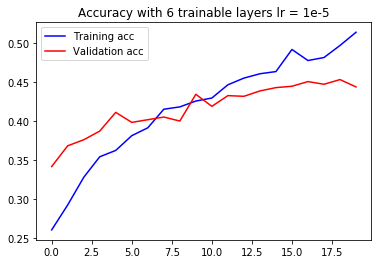

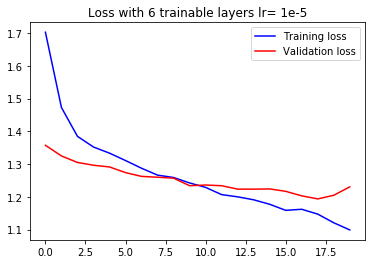

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy with 6 trainable layers lr = 1e-5')
plt.legend()

plt.savefig("acc2.png")
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss with 6 trainable layers lr= 1e-5')
plt.legend()

plt.savefig("loss2.png")
plt.show()


In [24]:
# VGG16 -fine tuning

#check performance
fnames = test_generator.filenames
 
ground_truth = test_generator.classes
 
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
predictions = model2.predict_classes(train_features2)
prob = model2.predict(test_features2)
 
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nTest))

acc = movie.movie['acc']
test_acc = movie.movie['val_acc']
loss = movie.movie['loss']
test_loss = movie.movie['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, test_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, test_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()
 
plt.show()

NameError: name 'train_features2' is not defined

In [38]:
# VGG16 -fine tuning

# Check images that were misclassified
for i in range(len(errors)):
    pred_class = np.argmax(prob[errors[i]])
    pred_label = idx2label[pred_class]
     
    print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        prob[errors[i]][pred_class]))
     
    original = load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.imshow(original)
    #plt.show()

NameError: name 'errors' is not defined